**Different data collection statergies**
- surveys
- from company side
- 3rd party API's

--------------------------------------------------------------------------------------------------------------------------

**why some of the values missing in the data ?**
- during the surveys some people may give the complete information or some may not give complete information due to their personal choise.for example in most of the cases girls don't want to mention their age where boys don't wan to mention their salary.

----------------------------------------------------------------------------------------------------------------------

**what are the types of missing data?**
- continuous/ Discrete
- Categorical

-----------------------------------------------------------------------------------------------------------------------------
**What are the different types of Missing Data?**                                                                               

- **Missing Completely at Random (MCAR)**: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

- **Missing Data Not At Random(MNAR)**: Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

**All the techniques of handling ,missing values**
- Mean/ Median/Mode replacement (Famous)
- Random Sample Imputation (Famous)
- Capturing NAN values with a new feature
- End of Distribution imputation
- Arbitrary imputation
- Frequent categories imputation

In [50]:
import pandas as pd #importing pandas library
import numpy as np
df=pd.read_csv("titanic.csv") # reads the data into dataframe df
df.head() #prints the first 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum() # gives the total number of missing records 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here "Age" & "Cabin" is not Missing Completely at Random (MCAR), it is Missing Data Not At Random(MNAR). cz there is a relationship between them. But here Embarked is Missing Completely at Random (MCAR).cz there is no relationship with others.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from above info we can get that age is a numerical data and Cabin,Embarked are categorical data 

# Mean/ Median /Mode imputation

**Mean**:it is a measure of central tendency of a probability distribution along median and mode. It is also referred to as an expected value.

**Median**:it is the middle number in a sorted list of numbers.

**Mode**:it is the value that appears most frequently in a data set.

**When should we apply?**
- Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

- we can replace the missing data with MEAN when the data is symmetric(that means not skewed) and we can apply this method only on numerical data only.

- we can replace the missing data with MEDIAN when the data is not symmetric(that means skewed) and we can apply this method only on numerical data only.

- we can replace the missing data with MODE when the data is not symmetric(that means skewed) and we can apply this method on both numerical data and categorical data.

in this example Age is a numerical data and 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

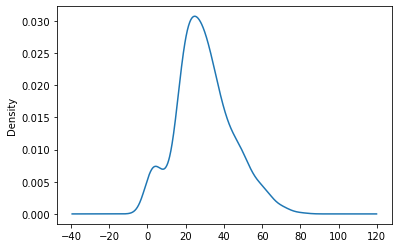

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)  

from the above fig we can see the that the data is symmetric so we can use median for replacing the missing values in Age

In [18]:
median=df.Age.median  # method to calculate median

In [19]:
# this is the function for filling the missing values with median
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median) #this will fill the median in the place of nan and store it in df[variable+"_median"]

- as we know that the Cabin,Embarked are categorical data we need to fill these values with mode

In [20]:
# this is the function for filling the missing values with mode
def impute_nan(df,variable,mode):
    df[variable+"_mode"]=df[variable].fillna(mode)

**Advantages**
- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset 

**Disadvantages**
- Change or Distortion in the original variance
- Impacts Correlation

# Random Sample Imputation

- Random sampling consists of taking a random observation from the pool of available observations of the variable and using those randomly selected values to fill in the missing ones.

- This method is suitable for numerical and categorical variables.

**Assumptions of random sample imputation**
- Data is missing at random.
- We’re replacing the missing values with other values within the same distribution of the original variable.

In [22]:
#df["Age"].dropna()   #this will drop all nan values
df["Age"].dropna().sample(random_state=0)  #this will give a row number of the nan value and the nan is filled with some random value

#that means 423 is a row where a nan value is present  and 28 is a age which is selected from the dataset at randomand and filled the position of nan value at row 423

423    28.0
Name: Age, dtype: float64

In [23]:
random_sample=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

#this will fill all the rows, which have missing values with the ronadom data from the dataset and store it in random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

in order to merge with the data frame the both random_sample and the data frame must have same index

step1
df["Age_random"]=df["Age"] -coping the data from Age and storing it in Age_random

step 2
random_sample=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

step 3
random_sample.index=df[df["Age"].isnull()].index - ordering the index in random_sample similar to df["Age"]

step 4
df.loc[df["Age"].isnull(),"Age_random"]=random_sample - replacing all the nan values in Agr_random with the values in random_sample which are already ordered

**Advantages of random sample imputation**
- Easy to implement and a fast way of obtaining complete datasets.
- It can be used in production.
- Preserves the variance of the variable.

**Disadvantages of random sample imputation**
- Randomness.
- The relationship between imputed variables and other variables may be affected if there are a lot of missing values.
- Memory is massive for deployment, as we need to store the original training set to extract values from, and replace the missing values with the randomly selected values.

# Capturing NAN values with a new feature

**A missing indicator is an additional binary variable that indicates whether the data was missing for an observation (1) or not (0). The goal here is to capture observations where data is missing.**


The missing indicator is used together with methods that assume data is missing at random:
- Mean, median, mode imputation.
- Random sample imputation.


**This method is suitable for categorical and numerical variables.**

In [51]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0) #here we are catching the Importance of missing value in the age_NAN colum

# as i mentioned above this method is used with one of the methods like Mean, median, mode imputatio,Random sample imputation.

**Advantages of missing indicator**
- Easy to implement.
- It can capture the importance of missing data.
- It can be integrated into production.

**Disadvantages of missing indicator**
- It expands the feature space.
- The original variable still needs to be imputed.
- Many missing indicators may end up being identical or very highly correlated.

# End of Distribution imputation¶

**It works well if the data are not missing completely at random. If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.**

**his method is suitable for numerical variables.**


**Here are ways to select arbitrary values:**

- If the variable follows a normal distribution, we can use the mean plus or minus 3 times the standard deviation.
- If the variable is skewed, we can use the IQR proximity rule.

**CAUTION**
- The values to replace missing data should be calculated only on the train set.

In [53]:
extreme=df.Age.mean()+3*df.Age.std() # extreme =mean+3*standard deviation
df["Age_end_distribution"]=df["Age"].fillna(extreme) # creating new variable and storing the values in the new variable

**Normal Distribution**
- Most of the observations (~99%) of a normally-distributed variable lie within the mean plus/minus three times standard deviations—for that the selected value = mean ± 3 ×standard deviations.

**Skewed distributions**
- The general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:
- IQR = 75th Quantile –25th Quantile.
- Upper limit = 75th Quantile + IQR ×3.
- Lower limit = 25th Quantile - IQR ×3.

**Advantages**
- Easy to implement
- Capture the importance of missingness if there is one

**Disadvantages**
- Distorts the original distribution of variable
- if missingness is not important, It may mask the predictive power of original variable by distoring its distribution
- If the number of NA is big, It will mask outlier in distribution
- If the number of NA is small, The replaced Na maybe considered an outlier

# Frequent category imputation
**Frequent category imputation—or mode imputation—consists of replacing all occurrences of missing values (NA) within a variable with the mode, or the most frequent value.**

- This method is suitable for numerical and categorical variables, but in practice, we use this technique with categorical variables.

- You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.

**Assumptions of frequent category imputation**
- Data is missing at random.
- The missing observations most likely look like the majority of the observations 

**the code will same like replacing nan values with mode**

**Advantages of frequent category imputation**
- Easy to implement.
- It’s a fast way to obtain a complete dataset.
- It can be used in production, i.e during model deployment.

**Disadvantages of frequent category imputation**
- It distorts the relation of the most frequent label with other variables within the dataset.
- May lead to an over-representation of the most frequent label if there is are a lot of missing observations.

# Arbitrary imputation

**Assumptions of arbitrary value imputation**
- Data is not missing at random.


**the code will same like replacing nan values with mean or median.**

**Advantages of arbitrary value imputation**
- Easy to implement.
- It’s a fast way to obtain complete datasets.
- It can be used in production, i.e during model deployment.
- It captures the importance of a value being “missing”, if there is one.

**Limitations arbitrary value imputation**
- Distortion of the original variable distribution and variance.
- Distortion of the covariance with the remaining dataset variables.
- If the arbitrary value is at the end of the distribution, it may mask or create outliers.
- The higher the percentage of NA, the higher the distortions.

**CAUTION**
- We need to be careful not to choose an arbitrary value too similar to the mean or median (or any other typical value of the variable distribution).
